<a href="https://colab.research.google.com/github/partha1189/ml/blob/master/KannadaMNIST_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import csv

In [3]:
labels = []
data = []

In [4]:
with open('train.csv', 'r') as file:
  reader = csv.reader(file)
  next(reader)
  for row in reader:
    labels.append(row[0])
    data.append(row[1:])
train_data = np.array(data, dtype='uint8')
train_label = np.array(labels, dtype='uint8')

In [5]:
train_data.shape

(60000, 784)

In [6]:
from tensorflow.keras.preprocessing import  image

In [7]:
train_data = train_data.reshape(-1, 28, 28)

In [8]:
train_data.shape

(60000, 28, 28)

In [9]:
train_data = np.expand_dims(train_data,axis=3)

In [10]:
train_data.shape

(60000, 28, 28, 1)

In [11]:
img = image.array_to_img(train_data[12])

In [12]:
img.show()

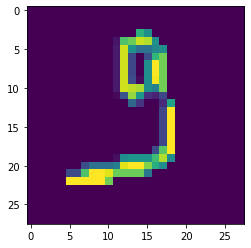

In [13]:
plt.imshow(img)

In [14]:
train_label[12]

2

In [15]:
labels = []
data = []

In [16]:
with open('test.csv', 'r') as file:
  reader = csv.reader(file)
  next(reader)
  for row in reader:
    labels.append(row[0])
    data.append(row[1:])
test_data = np.array(data, dtype='uint8')
test_label = np.array(labels, dtype='uint8')

In [17]:
test_data.shape

(5000, 784)

In [18]:
test_data = test_data.reshape(-1, 28, 28)
test_data = np.expand_dims(test_data,axis=3)

In [19]:
test_data.shape

(5000, 28, 28, 1)

In [20]:
train_data_final = train_data[:50000]
train_label_final = train_label[:50000]
valid_data = train_data[50000:]
valid_label = train_label[50000:]

In [21]:
valid_data.shape

(10000, 28, 28, 1)

In [23]:
model = tf.keras.Sequential([
   tf.keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28 , 1), activation=tf.keras.activations.relu),
   tf.keras.layers.MaxPool2D(2, 2),
   tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.relu),
   tf.keras.layers.MaxPool2D(2, 2), 
  #  tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.relu),
  #  tf.keras.layers.MaxPool2D(2, 2),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(512, activation='relu'),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(10, activation='softmax')                           
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               819712    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)              

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale=1/255)

In [26]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), metrics=['accuracy'])

In [27]:
model.fit(train_datagen.flow(train_data_final, train_label_final),
          epochs=20,
          validation_data=valid_datagen.flow(valid_data, valid_label),
          verbose = 2)

Epoch 1/20
1563/1563 - 11s - loss: 0.6840 - accuracy: 0.7914 - val_loss: 0.1550 - val_accuracy: 0.9535
Epoch 2/20
1563/1563 - 11s - loss: 0.2415 - accuracy: 0.9268 - val_loss: 0.0994 - val_accuracy: 0.9696
Epoch 3/20
1563/1563 - 11s - loss: 0.1673 - accuracy: 0.9493 - val_loss: 0.0740 - val_accuracy: 0.9785
Epoch 4/20
1563/1563 - 11s - loss: 0.1390 - accuracy: 0.9580 - val_loss: 0.0716 - val_accuracy: 0.9784
Epoch 5/20
1563/1563 - 11s - loss: 0.1204 - accuracy: 0.9640 - val_loss: 0.0654 - val_accuracy: 0.9812
Epoch 6/20
1563/1563 - 11s - loss: 0.1073 - accuracy: 0.9676 - val_loss: 0.0700 - val_accuracy: 0.9807
Epoch 7/20
1563/1563 - 11s - loss: 0.0979 - accuracy: 0.9707 - val_loss: 0.0645 - val_accuracy: 0.9815
Epoch 8/20
1563/1563 - 11s - loss: 0.0908 - accuracy: 0.9726 - val_loss: 0.0557 - val_accuracy: 0.9836
Epoch 9/20
1563/1563 - 11s - loss: 0.0835 - accuracy: 0.9743 - val_loss: 0.0606 - val_accuracy: 0.9824
Epoch 10/20
1563/1563 - 11s - loss: 0.0825 - accuracy: 0.9750 - val_loss:

In [29]:
model.evaluate(test_data, test_label)

157/157 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0040


[nan, 0.004000000189989805]

In [33]:
X_new = test_data[:10]
y_prob = model.predict(X_new)
print(y_prob.round(2))

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [34]:
y_pred = model.predict_classes(X_new)
print(y_pred)

[3 1 2 6 7 7 1 9 1 4]


In [35]:
y_new = test_label[:10]
print(y_new)

[0 1 2 3 4 5 6 7 8 9]
